In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from data import get_data

In [31]:
data = get_data()

## function for metrics

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def print_metrics(y_true, y_pred):
    print('Precision: ', precision_score(y_true, y_pred) * 100, '%')
    print('Recall: ', recall_score(y_true, y_pred) * 100, '%')
    print('F1 Score: ', f1_score(y_true, y_pred) * 100, '%')
    print('Accuracy: ', accuracy_score(y_true, y_pred) * 100, '%')

<Axes: >

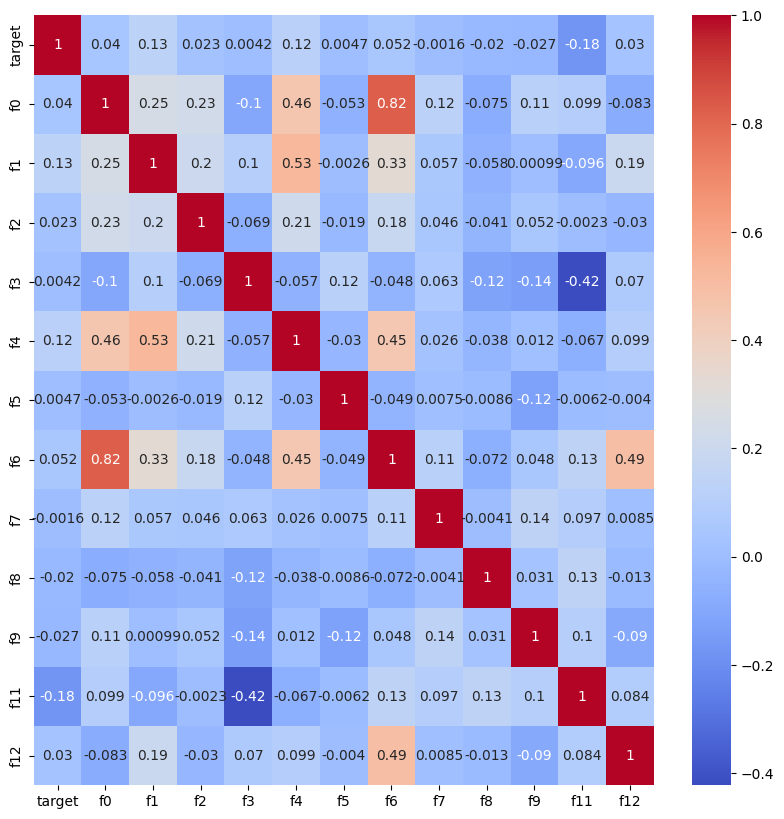

In [5]:
# plot correlation
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Models

## Data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
train_val_df, test_df = train_test_split(data, test_size=0.02, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.025, random_state=42)  

In [34]:
train_y = train_df['target']
train_x = train_df.drop(columns=['target'])

val_y = val_df['target']
val_x = val_df.drop(columns=['target'])

test_y = test_df['target']
test_x = test_df.drop(columns=['target'])


scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

In [9]:
print(train_x.shape, val_x.shape, test_x.shape)

(1001723, 12) (25686, 12) (20968, 12)


## Lenear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [36]:
train_pred = model.predict(train_x)
val_pred = model.predict(val_x)
test_pred = model.predict(test_x)

In [37]:
# metrics precision, recall, f1-score, accuracy

print('Train Metrics')
print_metrics(train_y, train_pred > 0.5)
print('Validation Metrics')
print_metrics(val_y, val_pred > 0.5)
print('Test Metrics')
print_metrics(test_y, test_pred > 0.5)

Train Metrics
Precision:  7.6 %
Recall:  0.11257257968953667 %
F1 Score:  0.22185894441849605 %
Accuracy:  98.29393954216884 %
Validation Metrics
Precision:  0.0 %
Recall:  0.0 %
F1 Score:  0.0 %
Accuracy:  98.30257727945184 %
Test Metrics
Precision:  0.0 %
Recall:  0.0 %
F1 Score:  0.0 %
Accuracy:  98.3689431514689 %


pretty bad, I would say

## Desision tree

In [14]:
from sklearn import tree

In [38]:
model_tree = tree.DecisionTreeClassifier(ccp_alpha=0.000005)

In [39]:
model_tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=5e-06)

In [40]:
# predict
train_pred = model_tree.predict(train_x)
val_pred = model_tree.predict(val_x)
test_pred = model_tree.predict(test_x)

print('Train Metrics')
print_metrics(train_y, train_pred > 0.1)
print('Validation Metrics')
print_metrics(val_y, val_pred > 0.1)
print('Test Metrics')
print_metrics(test_y, test_pred > 0.1)

Train Metrics
Precision:  83.74477533960292 %
Recall:  75.97464154520678 %
F1 Score:  79.67070518794657 %
Accuracy:  99.34672559180532 %
Validation Metrics
Precision:  81.77083333333334 %
Recall:  72.51732101616628 %
F1 Score:  76.86658506731946 %
Accuracy:  99.26419060967064 %
Test Metrics
Precision:  82.5503355704698 %
Recall:  72.7810650887574 %
F1 Score:  77.35849056603774 %
Accuracy:  99.31323922167111 %


obviosly overfitting 

## Decision forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(train_x, train_y)

RandomForestRegressor(random_state=42)

In [23]:
# metrics
train_pred = model_forest.predict(train_x)
val_pred = model_forest.predict(val_x)
test_pred = model_forest.predict(test_x)

print('Train Metrics')
print_metrics(train_y, train_pred > 0.5)
print('Validation Metrics')
print_metrics(val_y, val_pred > 0.5)
print('Test Metrics')
print_metrics(test_y, test_pred > 0.5)  

Train Metrics
Precision:  100.0 %
Recall:  99.95260101907809 %
F1 Score:  99.97629489154913 %
Accuracy:  99.9992013760291 %
Validation Metrics
Precision:  84.47837150127226 %
Recall:  76.6743648960739 %
F1 Score:  80.38740920096852 %
Accuracy:  99.36930623686054 %
Test Metrics
Precision:  82.64984227129337 %
Recall:  77.51479289940828 %
F1 Score:  80.0 %
Accuracy:  99.37523845860359 %


In [11]:

import joblib

In [ ]:
# save model

joblib.dump(model_forest, 'model_forest.pkl')

['model_forest.pkl']

In [12]:
# load model 
model_forest = joblib.load('model_forest.pkl')

In [24]:
train_pred = model_forest.predict(train_x)
val_pred = model_forest.predict(val_x)
test_pred = model_forest.predict(test_x)

In [22]:
# classification report 
from sklearn.metrics import classification_report

print(classification_report(test_y , pd.Series(test_pred > 0.45)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20630
           1       0.83      0.73      0.77       338

    accuracy                           0.99     20968
   macro avg       0.91      0.86      0.89     20968
weighted avg       0.99      0.99      0.99     20968



In [32]:
print(classification_report(val_y , pd.Series(val_pred > 0.45)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25253
           1       0.83      0.79      0.81       433

    accuracy                           0.99     25686
   macro avg       0.91      0.89      0.90     25686
weighted avg       0.99      0.99      0.99     25686



In [27]:
print(classification_report(train_y , pd.Series(train_pred > 0.5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    984845
           1       1.00      1.00      1.00     16878

    accuracy                           1.00   1001723
   macro avg       1.00      1.00      1.00   1001723
weighted avg       1.00      1.00      1.00   1001723



obviosly overfitting 

## Graient boosting

In [41]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [42]:
clf.fit(train_x, train_y)

[LightGBM] [Info] Number of positive: 16878, number of negative: 984845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 1001723, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016849 -> initscore=-4.066473
[LightGBM] [Info] Start training from score -4.066473


LGBMClassifier()

In [43]:
# metrics

train_pred = clf.predict(train_x)
val_pred = clf.predict(val_x)
test_pred = clf.predict(test_x)

print('Train Metrics')
print_metrics(train_y, train_pred > 0.45)
print('Validation Metrics')
print_metrics(val_y, val_pred > 0.45)
print('Test Metrics')
print_metrics(test_y, test_pred > 0.45)

Train Metrics
Precision:  81.12202852614897 %
Recall:  75.82059485721057 %
F1 Score:  78.38177196582244 %
Accuracy:  99.29531417367875 %
Validation Metrics
Precision:  78.66004962779157 %
Recall:  73.21016166281755 %
F1 Score:  75.83732057416267 %
Accuracy:  99.21357938176439 %
Test Metrics
Precision:  78.84615384615384 %
Recall:  72.7810650887574 %
F1 Score:  75.6923076923077 %
Accuracy:  99.24647081266691 %


In [44]:
import xgboost as xgb

In [45]:
model_xgb = xgb.XGBClassifier()

model_xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
# metrics

train_pred = model_xgb.predict(train_x)
val_pred = model_xgb.predict(val_x)
test_pred = model_xgb.predict(test_x)

print('Train Metrics')
print_metrics(train_y, train_pred > 0.35)
print('Validation Metrics')
print_metrics(val_y, val_pred > 0.35)
print('Test Metrics')
print_metrics(test_y, test_pred > 0.35)

Train Metrics
Precision:  85.66219559838521 %
Recall:  77.9476241260813 %
F1 Score:  81.6230301526244 %
Accuracy:  99.40861894954992 %
Validation Metrics
Precision:  82.68733850129199 %
Recall:  73.90300230946882 %
F1 Score:  78.04878048780488 %
Accuracy:  99.29922915206727 %
Test Metrics
Precision:  82.94314381270902 %
Recall:  73.37278106508876 %
F1 Score:  77.86499215070644 %
Accuracy:  99.32754673788631 %


## Fully connected (dense) neural network

In [22]:
import tensorflow as tf

2024-11-11 10:03:09.665249: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 10:03:09.948417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731312190.062760    7523 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731312190.093250    7523 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 10:03:10.393210: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [23]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import Precision, Recall, Accuracy

In [25]:
model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam,  metrics=[
        Precision(),
        Recall(),
        Accuracy()
    ])

/home/qwas/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731312213.371856    7523 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1422 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BATCH_SIZE = 2048
def early_stopping():
 return tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [19]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30


I0000 00:00:1730578019.459101    1370 service.cc:148] XLA service 0x7f8554024210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730578019.461555    1370 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce MX230, Compute Capability 6.1
2024-11-02 22:06:59.667138: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730578020.205702    1370 cuda_dnn.cc:529] Loaded cuDNN version 90300


 10/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0000e+00 - loss: 0.5887 - precision: 0.0059 - recall: 0.0266   

I0000 00:00:1730578024.352134    1370 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


446/490 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1215 - precision: 0.0431 - recall: 0.0042

E0000 00:00:1730578029.741521    1369 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


457/490 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1204 - precision: 0.0481 - recall: 0.0048

E0000 00:00:1730578030.409554    1369 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1730578030.561725    1369 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


489/490 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.1175 - precision: 0.0617 - recall: 0.0058

E0000 00:00:1730578031.401459    1369 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


490/490 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.0000e+00 - loss: 0.1173 - precision: 0.0624 - recall: 0.0059 - val_accuracy: 0.0000e+00 - val_loss: 0.0466 - val_precision: 0.6471 - val_recall: 0.1279
Epoch 2/30


/home/qwas/miniconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_prc` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)


490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0455 - precision: 0.6250 - recall: 0.2277 - val_accuracy: 0.0000e+00 - val_loss: 0.0389 - val_precision: 0.7353 - val_recall: 0.2907
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0368 - precision: 0.6874 - recall: 0.4340 - val_accuracy: 0.0000e+00 - val_loss: 0.0338 - val_precision: 0.7364 - val_recall: 0.4419
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0339 - precision: 0.6951 - recall: 0.5097 - val_accuracy: 0.0000e+00 - val_loss: 0.0317 - val_precision: 0.7664 - val_recall: 0.5419
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0321 - precision: 0.7092 - recall: 0.5575 - val_accuracy: 0.0000e+00 - val_loss: 0.0320 - val_precision: 0.7244 - val_recall: 0.5930
Epoch 6/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0318 - precision: 0.7309 - recall: 0.5758 - val_

In [20]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0241 - precision: 0.8024 - recall: 0.7379 - val_accuracy: 0.0000e+00 - val_loss: 0.0236 - val_precision: 0.7884 - val_recall: 0.7884
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0239 - precision: 0.8024 - recall: 0.7444 - val_accuracy: 0.0000e+00 - val_loss: 0.0240 - val_precision: 0.8422 - val_recall: 0.7326
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0241 - precision: 0.8034 - recall: 0.7432 - val_accuracy: 0.0000e+00 - val_loss: 0.0231 - val_precision: 0.8312 - val_recall: 0.7558
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0241 - precision: 0.8076 - recall: 0.7407 - val_accuracy: 0.0000e+00 - val_loss: 0.0228 - val_precision: 0.8480 - val_recall: 0.7395
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0239 - precision: 0.8026 - recall: 0

In [21]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 3.8810e-08 - loss: 0.0234 - precision: 0.8139 - recall: 0.7353 - val_accuracy: 0.0000e+00 - val_loss: 0.0226 - val_precision: 0.8329 - val_recall: 0.7302
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 1.3460e-06 - loss: 0.0236 - precision: 0.8150 - recall: 0.7363 - val_accuracy: 0.0000e+00 - val_loss: 0.0223 - val_precision: 0.8235 - val_recall: 0.7814
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 2.2322e-06 - loss: 0.0233 - precision: 0.8149 - recall: 0.7435 - val_accuracy: 0.0000e+00 - val_loss: 0.0234 - val_precision: 0.7646 - val_recall: 0.7930
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 1.3474e-05 - loss: 0.0233 - precision: 0.8171 - recall: 0.7464 - val_accuracy: 0.0000e+00 - val_loss: 0.0216 - val_precision: 0.8380 - val_recall: 0.7698
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 1.0546e-05 - loss: 0.0228 - precision: 0.8176 - recall: 0.7

In [22]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 5.5333e-05 - loss: 0.0223 - precision: 0.8262 - recall: 0.7505 - val_accuracy: 3.8924e-05 - val_loss: 0.0228 - val_precision: 0.8320 - val_recall: 0.7488
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 5.7747e-05 - loss: 0.0223 - precision: 0.8256 - recall: 0.7450 - val_accuracy: 7.7848e-05 - val_loss: 0.0224 - val_precision: 0.8367 - val_recall: 0.7628
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.7062e-05 - loss: 0.0224 - precision: 0.8286 - recall: 0.7467 - val_accuracy: 3.8924e-05 - val_loss: 0.0219 - val_precision: 0.8291 - val_recall: 0.7674
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 5.8772e-05 - loss: 0.0228 - precision: 0.8250 - recall: 0.7473 - val_accuracy: 3.8924e-05 - val_loss: 0.0221 - val_precision: 0.8403 - val_recall: 0.7465
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 7.0242e-05 - loss: 0.0225 - precision: 0.8234 - recall: 

In [ ]:
model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.2032e-04 - loss: 0.0217 - precision: 0.8284 - recall: 0.7549 - val_accuracy: 3.8924e-04 - val_loss: 0.0213 - val_precision: 0.8501 - val_recall: 0.7651
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 5.6254e-04 - loss: 0.0217 - precision: 0.8361 - recall: 0.7534 - val_accuracy: 3.5032e-04 - val_loss: 0.0223 - val_precision: 0.8560 - val_recall: 0.7605
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 6.0614e-04 - loss: 0.0221 - precision: 0.8322 - recall: 0.7498 - val_accuracy: 6.6171e-04 - val_loss: 0.0221 - val_precision: 0.8400 - val_recall: 0.7814
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 6.4335e-04 - loss: 0.0218 - precision: 0.8343 - recall: 0.7510 - val_accuracy: 4.2817e-04 - val_loss: 0.0224 - val_precision: 0.8541 - val_recall: 0.7349
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 6.4013e-04 - loss: 0.0215 - precision: 0.8282 - recall:

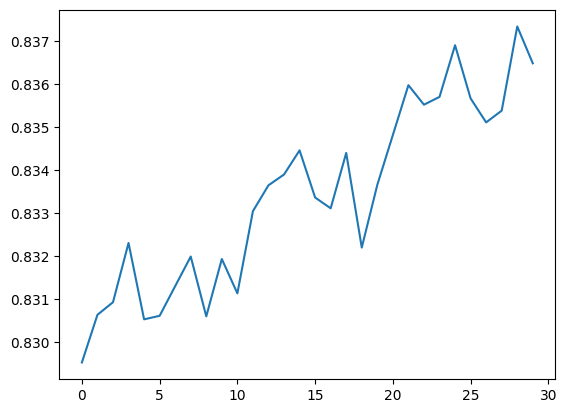

In [24]:
#draw metrics
plt.plot(model.history.history['precision'])

In [ ]:
# metrics

train_pred = model.predict(train_x)
val_pred = model.predict(val_x)
test_pred = model.predict(test_x)

31310/31310 ━━━━━━━━━━━━━━━━━━━━ 122s 4ms/step
803/803 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
656/656 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [ ]:
train_pred_1 = np.array(train_pred).reshape(-1)
val_pred_1 = np.array(val_pred).reshape(-1)
test_pred_1 = np.array(test_pred).reshape(-1)

In [ ]:
print('Train Metrics')
print_metrics(train_y, train_pred_1 > 0.5)
print('Validation Metrics')
print_metrics(val_y, val_pred_1 > 0.5)
print('Test Metrics')
print_metrics(test_y, test_pred_1 > 0.5)

Train Metrics
Precision:  83.04422966139666 %
Recall:  76.4796038670125 %
F1 Score:  79.62684506091387 %
Accuracy:  99.33736695438323 %
Validation Metrics
Precision:  84.01015228426397 %
Recall:  76.9767441860465 %
F1 Score:  80.33980582524272 %
Accuracy:  99.3694289829123 %
Test Metrics
Precision:  81.1377245508982 %
Recall:  75.4874651810585 %
F1 Score:  78.21067821067821 %
Accuracy:  99.27999237078009 %


In [30]:
# save model
model.save('model_dense.keras')

In [26]:
# load model
model = tf.keras.models.load_model('model_dense.keras')

In [16]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train contains the labels of your training data
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=train_y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}


In [21]:
class_weight_dict

{0: 0.5086116221363971, 1: 29.530535251120018}

In [28]:
model.fit(train_x, train_y, epochs=20, batch_size=BATCH_SIZE, validation_data=(val_x, val_y),
          class_weight=class_weight_dict)

KeyError: 52

In [ ]:

model.fit(train_x, train_y, validation_data=(val_x, val_y), callbacks=[early_stopping()], batch_size=BATCH_SIZE, epochs=30)